In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

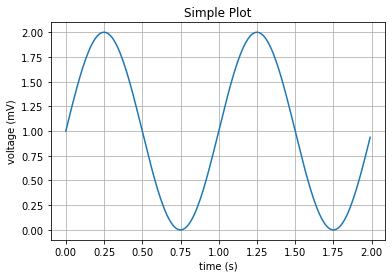

In [127]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

plt.plot(t, s)
plt.xlabel("time (s)")
plt.ylabel("voltage (mV)")
plt.title("Simple Plot")
plt.grid()
plt.savefig("test.jpg")
plt.show()

In [87]:
CELL_SIZE = 0.5
cells_in_x = np.arange(0, 4+CELL_SIZE, CELL_SIZE)
cells_in_y = np.arange(0, 8+CELL_SIZE, CELL_SIZE)
print(len(cells_in_x)-1)
print(len(cells_in_y)-1)

8
16


In [89]:
cells = []
for ix, x in enumerate(cells_in_x):
    if ix == 0:
        continue
    for iy, y in enumerate(cells_in_y):
        if iy == 0:
            continue

        cells.append(pd.DataFrame([[i for i in range(3)], [i for i in range(3)]], columns=["x", "y", "z"]))

In [116]:
def get_cell_neighbors(cells, cells_in_x, cells_in_y, num_neighbors):
    num_cells_in_y = len(cells_in_y)-1

    neighbors = {}
    non_edge_cells = []

    for cell_idx in range(len(cells)):
        if cell_idx < num_cells_in_y*num_neighbors or cell_idx >= len(cells)-num_cells_in_y*num_neighbors:
            continue # Continue on horizontal edges
        if (cell_idx % num_cells_in_y) < num_neighbors:
            continue
        if (cell_idx % num_cells_in_y) >= num_cells_in_y-num_neighbors:
            continue

        neighbors[cell_idx] = []
        for nx in range(1, num_neighbors+1):
            neighbors[cell_idx].append(cell_idx-(num_cells_in_y*nx)) # Neighbors to the left
            neighbors[cell_idx].append(cell_idx-nx) # Neighbors above
            neighbors[cell_idx].append(cell_idx+nx) # Neighbors below
            neighbors[cell_idx].append(cell_idx+(num_cells_in_y*nx)) # Neighbors to the right
            for ny in range(1, num_neighbors+1):       
                neighbors[cell_idx].append(cell_idx-((num_cells_in_y*nx)+ny)) # Left corners
                neighbors[cell_idx].append(cell_idx-((num_cells_in_y*nx)-ny)) # Left corners
                neighbors[cell_idx].append(cell_idx+((num_cells_in_y*nx)-ny)) # Right corners
                neighbors[cell_idx].append(cell_idx+((num_cells_in_y*nx)+ny)) # Right corners

        non_edge_cells.append(cell_idx)

    return neighbors, non_edge_cells

In [120]:
# Get neighbor cells
num_neighbors = 1
neighbors, non_edge_cells = get_cell_neighbors(cells, cells_in_x, cells_in_y, num_neighbors)